Index(['id', 'candidate', 'song', 'artist', 'sentiment', 'theme',
       'album_release_date', 'line', 'url', 'song_views', 'release_date',
       'years_match', 'corrected_release_year', 'split_lyrics'],
      dtype='object')
    id candidate             song      artist sentiment      theme  \
7    8  Jeb Bush        Bush Song  Macklemore  negative  political   
9   10  Jeb Bush  Chamber of Fear         RZA   neutral   personal   
10  11  Jeb Bush      Tell Me Why        Zeno   neutral   personal   

    album_release_date                                               line  \
7                 2005               Way to go Jeb, really great strategy   
9                 2005                 Bobby got Bush like George and Jeb   
10                2005  I was promised eternal life from the beginning...   

                                                 url  song_views release_date  \
7      http://genius.com/Macklemore-bush-song-lyrics        9265     10/10/05   
9       http://genius

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


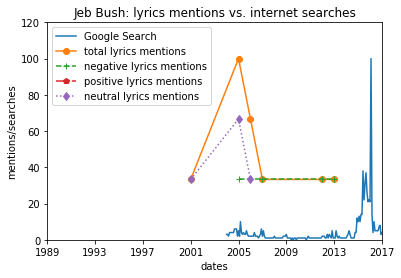

In [4]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

list_time = []
list_search = []
with open('GoogleTrends_JBush.csv','rt',encoding='utf-8') as CSVread:
    for i in range(3):
        next(CSVread)
    CSV_read = csv.reader(CSVread)
    for month,search in CSV_read:
        if search == '<1':
            search = 0
        list_time.append(datetime.strptime(month,'%Y-%m'))
        list_search.append(float(search))
#     list_data = [dict(row) for row in CSV_read]
# list_data
series_data = pd.DataFrame({'month':list_time,
                            'searches':list_search})
plot1 = plt.plot_date(series_data['month'],series_data['searches'],fmt='-',label='Google Search')


#Import the lyrics mentions data for Trump
df_lyrics = pd.read_csv('HipHopLyrics_corrected.csv', encoding="ISO-8859-1")
df_lyrics['corrected_release_year'] = df_lyrics['corrected_release_year'].astype(str)
print(df_lyrics.columns)
df_lyrics_check = df_lyrics.copy()
df_lyrics_check['corrected_release_year'] = pd.to_datetime(df_lyrics_check['corrected_release_year'])
df_lyrics_check = df_lyrics_check[df_lyrics_check.candidate == 'Jeb Bush'][df_lyrics_check.corrected_release_year<'2006'][df_lyrics_check.corrected_release_year>'2004']
print(df_lyrics_check)
df_lyrics['count'] = 1
df_lyrics1 = df_lyrics[df_lyrics.candidate == 'Jeb Bush'].groupby('corrected_release_year').sum()
df_lyrics1.reset_index(level=0,inplace=True)
df_lyrics1['corrected_release_year'] = pd.to_datetime(df_lyrics1['corrected_release_year'])

# negative mentions
df_lyrics2 = df_lyrics[df_lyrics.candidate == 'Jeb Bush']
df_lyrics2 = df_lyrics2[df_lyrics2.sentiment == 'negative'].groupby('corrected_release_year').sum()
df_lyrics2.reset_index(level=0,inplace=True)
df_lyrics2['corrected_release_year'] = pd.to_datetime(df_lyrics2['corrected_release_year'])

# positive mentions
df_lyrics3 = df_lyrics[df_lyrics.candidate == 'Jeb Bush']
df_lyrics3 = df_lyrics3[df_lyrics3.sentiment == 'positive'].groupby('corrected_release_year').sum()
df_lyrics3.reset_index(level=0,inplace=True)
df_lyrics3['corrected_release_year'] = pd.to_datetime(df_lyrics3['corrected_release_year'])

# neutral mentions
df_lyrics4 = df_lyrics[df_lyrics.candidate == 'Jeb Bush']
df_lyrics4 = df_lyrics4[df_lyrics4.sentiment == 'neutral'].groupby('corrected_release_year').sum()
df_lyrics4.reset_index(level=0,inplace=True)
df_lyrics4['corrected_release_year'] = pd.to_datetime(df_lyrics4['corrected_release_year'])
# print(df_lyrics4)
# print(df_lyrics1['album_release_date'])
# print(df_lyrics1['count'])
#scaling
val_max = df_lyrics1['count'].max()
df_lyrics1['count'] = df_lyrics1['count']*100/val_max
df_lyrics2['count'] = df_lyrics2['count']*100/val_max
df_lyrics3['count'] = df_lyrics3['count']*100/val_max
df_lyrics4['count'] = df_lyrics4['count']*100/val_max
plot1 = plt.plot(df_lyrics1['corrected_release_year'],df_lyrics1['count'],label='total lyrics mentions',marker='o')
plot1 = plt.plot(df_lyrics2['corrected_release_year'],df_lyrics2['count'],label='negative lyrics mentions', marker='+', linestyle='--')
plot1 = plt.plot(df_lyrics3['corrected_release_year'],df_lyrics3['count'],label='positive lyrics mentions', marker='p', linestyle='-.')
plot1 = plt.plot(df_lyrics4['corrected_release_year'],df_lyrics4['count'],label='neutral lyrics mentions', marker='d', linestyle=':')


plt.legend()
plt.xlabel('dates')
plt.ylabel('mentions/searches')
plt.title('Jeb Bush: lyrics mentions vs. internet searches')
plt.xlim(datetime(1989,1,1),datetime(2017,1,1))
plt.ylim(0,120)
plt.savefig('Jeb Bush comparison plot.png')

Index(['id', 'candidate', 'song', 'artist', 'sentiment', 'theme',
       'album_release_date', 'line', 'url', 'lyrics_views',
       'track_release_date', 'years_match', 'corrected_release_year',
       'split_lyrics'],
      dtype='object')
      id        candidate                                       song  \
16    17  Hillary Clinton                           Thugz Tear Dropz   
18    19  Hillary Clinton                                Shorty Baby   
19    20  Hillary Clinton                                Take Notice   
20    21  Hillary Clinton                                 Disgusting   
29    30  Hillary Clinton                         Nothing on My Mind   
30    31  Hillary Clinton                               Gossip Folks   
31    32  Hillary Clinton            No Church in the Wild Freestyle   
51    52  Hillary Clinton                                     Greasy   
59    60  Hillary Clinton  Mayor Bloomberg: Who's Really in Control?   
61    62  Hillary Clinton          Bit

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


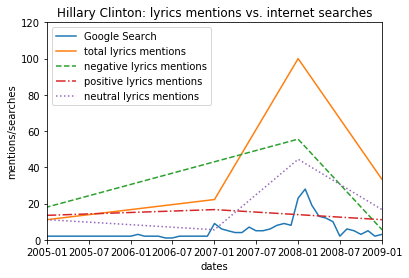

In [7]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

list_time = []
list_search = []
with open('GoogleTrends_HClinton.csv','rt',encoding='utf-8') as CSVread:
    for i in range(3):
        next(CSVread)
    CSV_read = csv.reader(CSVread)
    for month,search in CSV_read:
        if search == '<1':
            search = 0
        list_time.append(datetime.strptime(month,'%Y-%m'))
        list_search.append(float(search))
#     list_data = [dict(row) for row in CSV_read]
# list_data
series_data = pd.DataFrame({'month':list_time,
                            'searches':list_search})
plot1 = plt.plot_date(series_data['month'],series_data['searches'],fmt='-',label='Google Search')


#Import the lyrics mentions data for Trump
df_lyrics = pd.read_csv('HipHopLyrics_corrected.csv', encoding="ISO-8859-1")
df_lyrics['corrected_release_year'] = df_lyrics['corrected_release_year'].astype(str)

print(df_lyrics.columns)
df_lyrics_check = df_lyrics.copy()
df_lyrics_check['corrected_release_year'] = pd.to_datetime(df_lyrics_check['corrected_release_year'])
df_lyrics_check = df_lyrics_check[df_lyrics_check.candidate == 'Hillary Clinton'][df_lyrics_check.corrected_release_year>'2011'][df_lyrics_check.corrected_release_year<'2014']
print(df_lyrics_check)

df_lyrics['count'] = 1
df_lyrics1 = df_lyrics[df_lyrics.candidate == 'Hillary Clinton'].groupby('corrected_release_year').sum()
df_lyrics1.reset_index(level=0,inplace=True)
df_lyrics1['corrected_release_year'] = pd.to_datetime(df_lyrics1['corrected_release_year'])

# negative mentions
df_lyrics2 = df_lyrics[df_lyrics.candidate == 'Hillary Clinton']
df_lyrics2 = df_lyrics2[df_lyrics2.sentiment == 'negative'].groupby('corrected_release_year').sum()
df_lyrics2.reset_index(level=0,inplace=True)
df_lyrics2['corrected_release_year'] = pd.to_datetime(df_lyrics2['corrected_release_year'])

# positive mentions
df_lyrics3 = df_lyrics[df_lyrics.candidate == 'Hillary Clinton']
df_lyrics3 = df_lyrics3[df_lyrics3.sentiment == 'positive'].groupby('corrected_release_year').sum()
df_lyrics3.reset_index(level=0,inplace=True)
df_lyrics3['corrected_release_year'] = pd.to_datetime(df_lyrics3['corrected_release_year'])

# neutral mentions
df_lyrics4 = df_lyrics[df_lyrics.candidate == 'Hillary Clinton']
df_lyrics4 = df_lyrics4[df_lyrics4.sentiment == 'neutral'].groupby('corrected_release_year').sum()
df_lyrics4.reset_index(level=0,inplace=True)
df_lyrics4['corrected_release_year'] = pd.to_datetime(df_lyrics4['corrected_release_year'])
# print(df_lyrics4)
# print(df_lyrics1['album_release_date'])
# print(df_lyrics1['count'])
#scaling
val_max = df_lyrics1['count'].max()
df_lyrics1['count'] = df_lyrics1['count']*100/val_max
df_lyrics2['count'] = df_lyrics2['count']*100/val_max
df_lyrics3['count'] = df_lyrics3['count']*100/val_max
df_lyrics4['count'] = df_lyrics4['count']*100/val_max
plot1 = plt.plot(df_lyrics1['corrected_release_year'],df_lyrics1['count'],label='total lyrics mentions')
plot1 = plt.plot(df_lyrics2['corrected_release_year'],df_lyrics2['count'],label='negative lyrics mentions', linestyle='--')
plot1 = plt.plot(df_lyrics3['corrected_release_year'],df_lyrics3['count'],label='positive lyrics mentions', linestyle='-.')
plot1 = plt.plot(df_lyrics4['corrected_release_year'],df_lyrics4['count'],label='neutral lyrics mentions', linestyle=':')


plt.legend()
plt.xlabel('dates')
plt.ylabel('mentions/searches')
plt.title('Hillary Clinton: lyrics mentions vs. internet searches')
plt.xlim(datetime(2005,1,1),datetime(2009,1,1))
plt.ylim(0,120)
plt.figure(figsize=(20,5))


Index(['id', 'candidate', 'song', 'artist', 'sentiment', 'theme',
       'album_release_date', 'line', 'url', 'song_views', 'release_date',
       'years_match', 'corrected_release_year', 'split_lyrics'],
      dtype='object')
      id     candidate                                      song  \
115  117  Donald Trump                                  No Shots   
120  122  Donald Trump                                   Trailer   
129  131  Donald Trump                            Open Your Mind   
130  132  Donald Trump                               PlaneWalker   
133  135  Donald Trump                             Molly (remix)   
134  136  Donald Trump                                Cloud Aura   
137  139  Donald Trump                                  Dipshits   
145  147  Donald Trump                             Hustle Harder   
147  149  Donald Trump                                    Motion   
148  150  Donald Trump                           Kick Back Music   
149  151  Donald Trump   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


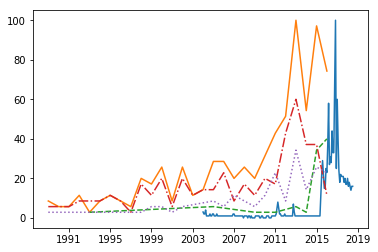

In [5]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

list_time = []
list_search = []
with open('GoogleTrends_DTrump.csv','rt',encoding='utf-8') as CSVread:
    for i in range(3):
        next(CSVread)
    CSV_read = csv.reader(CSVread)
    for month,search in CSV_read:
        if search == '<1':
            search = 0
        list_time.append(datetime.strptime(month,'%Y-%m'))
        list_search.append(float(search))
#     list_data = [dict(row) for row in CSV_read]
# list_data
series_data = pd.DataFrame({'month':list_time,
                            'searches':list_search})
plot1 = plt.plot_date(series_data['month'],series_data['searches'],fmt='-',label='Google Search')


#Import the lyrics mentions data for Trump
df_lyrics = pd.read_csv('HipHopLyrics_corrected.csv', encoding="ISO-8859-1")
df_lyrics['corrected_release_year'] = df_lyrics['corrected_release_year'].astype(str)

print(df_lyrics.columns)
df_lyrics_check = df_lyrics.copy()
df_lyrics_check['corrected_release_year'] = pd.to_datetime(df_lyrics_check['corrected_release_year'])
df_lyrics_check = df_lyrics_check[df_lyrics_check.candidate == 'Donald Trump'][df_lyrics_check.corrected_release_year>'2007'][df_lyrics_check.corrected_release_year<'2018']
print(df_lyrics_check)

df_lyrics['count'] = 1
df_lyrics1 = df_lyrics[df_lyrics.candidate == 'Donald Trump'].groupby('corrected_release_year').sum()
df_lyrics1.reset_index(level=0,inplace=True)
df_lyrics1['corrected_release_year'] = pd.to_datetime(df_lyrics1['corrected_release_year'])

# negative mentions
df_lyrics2 = df_lyrics[df_lyrics.candidate == 'Donald Trump']
df_lyrics2 = df_lyrics2[df_lyrics2.sentiment == 'negative'].groupby('corrected_release_year').sum()
df_lyrics2.reset_index(level=0,inplace=True)
df_lyrics2['corrected_release_year'] = pd.to_datetime(df_lyrics2['corrected_release_year'])

# positive mentions
df_lyrics3 = df_lyrics[df_lyrics.candidate == 'Donald Trump']
df_lyrics3 = df_lyrics3[df_lyrics3.sentiment == 'positive'].groupby('corrected_release_year').sum()
df_lyrics3.reset_index(level=0,inplace=True)
df_lyrics3['corrected_release_year'] = pd.to_datetime(df_lyrics3['corrected_release_year'])

# neutral mentions
df_lyrics4 = df_lyrics[df_lyrics.candidate == 'Donald Trump']
df_lyrics4 = df_lyrics4[df_lyrics4.sentiment == 'neutral'].groupby('corrected_release_year').sum()
df_lyrics4.reset_index(level=0,inplace=True)
df_lyrics4['corrected_release_year'] = pd.to_datetime(df_lyrics4['corrected_release_year'])
# print(df_lyrics4)
# print(df_lyrics1['album_release_date'])
# print(df_lyrics1['count'])
#scaling
val_max = df_lyrics1['count'].max()
df_lyrics1['count'] = df_lyrics1['count']*100/val_max
df_lyrics2['count'] = df_lyrics2['count']*100/val_max
df_lyrics3['count'] = df_lyrics3['count']*100/val_max
df_lyrics4['count'] = df_lyrics4['count']*100/val_max
plot1 = plt.plot(df_lyrics1['corrected_release_year'],df_lyrics1['count'],label='total lyrics mentions')
plot1 = plt.plot(df_lyrics2['corrected_release_year'],df_lyrics2['count'],label='negative lyrics mentions', linestyle='--')
plot1 = plt.plot(df_lyrics3['corrected_release_year'],df_lyrics3['count'],label='positive lyrics mentions', linestyle='-.')
plot1 = plt.plot(df_lyrics4['corrected_release_year'],df_lyrics4['count'],label='neutral lyrics mentions', linestyle=':')



